<a href="https://colab.research.google.com/github/LucasBezerraSantos/Alura_Machine_Learning/blob/master/Avan%C3%A7os_na_Classifica%C3%A7%C3%A3o_Machine_Learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Técnicas de Classificação - Machine Learning II 
----------
Lucas Bezerra Santos

Neste projeto trabalharemos com dados de clientes, com o objetivo de classificar potenciais cancelamentos de assinaturas do serviço, baseado em caracteristícias de consumo e informações pessoias.

## Leitura e transformação de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Conjuntos_de_Dados/ML_Alura/ML_II.csv')

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


**Converte em dados numéricos**

In [5]:
traducao_dic = { 'Sim': 1,
                 'Nao': 0 }

dados_modificados = dados[[  'Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'  ]].replace( traducao_dic )

In [6]:
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


**Com exceção dos dados ja convertidos "dados_modificados", a função get_dummies tranforma as demais colunas em numérico.**

In [7]:
dummie_dados = pd.get_dummies(dados.drop(dados_modificados, axis=1))

dados_final = pd.concat([dummie_dados, dados_modificados], axis=1 )

In [8]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1


## Conjuntos de Treino e Teste

### Balanceamento 

O balanceamento de dados é importante porque muitos algoritmos de Machine Learning são sensíveis a desequilíbrios nos dados de treinamento. Isso significa que eles podem ser prejudicados ou produzir resultados imprecisos se a proporção de amostras de diferentes classes não for adequada | CHAT GPT

**Visualização das classes**

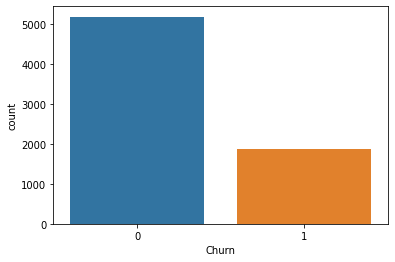

In [9]:
import seaborn as sns

ax = sns.countplot(x='Churn', data=dados_final)

**Equilibrando os dados**

In [10]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [12]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

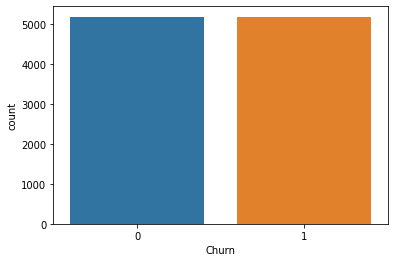

In [13]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## Modelagem

### Normalização

É importante colocar os dados na mesma escala antes de rodar um modelo de classificação porque muitos algoritmos usam medidas de distância para avaliar a similaridade entre amostras e se os dados estiverem em diferentes escalas, a medida de distância será dominada pelas variáveis com valores maiores, afetando negativamente o desempenho do modelo. Além disso, a normalização dos dados pode acelerar a convergência e melhorar a estabilidade dos algoritmos | CHAT GPT

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X_normalizado = scaler.fit_transform(X)
X_normalizado

array([[-0.41334384, -1.10768354, -1.32176205, ..., -0.52756038,
        -3.06083934,  0.8149851 ],
       [-0.41334384,  0.26721362, -0.37957908, ..., -0.52756038,
         0.32670777, -1.2270163 ],
       [-0.41334384, -1.06601999, -0.48735647, ..., -0.52756038,
         0.32670777,  0.8149851 ],
       ...,
       [-0.41334384, -0.39940319,  0.07985323, ..., -0.52756038,
         0.32670777,  0.8149851 ],
       [-0.41334384,  0.10055942,  0.87462727, ..., -0.52756038,
         0.32670777, -1.2270163 ],
       [-0.41334384, -0.98269289, -0.59059881, ..., -0.52756038,
         0.32670777, -1.2270163 ]])

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
knn = KNeighborsClassifier(metric= 'euclidean')

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X_normalizado, y, test_size=0.30, random_state=42)

knn.fit(X_train, y_train)
previsao_knn = knn.predict(X_test)

### Naive Bayes

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
mediana = np.median(X_train)

**Para separar dados de modo Binário**

In [22]:
bnb = BernoulliNB(binarize=mediana)

In [23]:
bnb.fit( X_train, y_train )

previsao_bnb = bnb.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

### Arvore de Decisão

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier(criterion= 'entropy', random_state=42)

dtc.fit(X_train, y_train)
previsao_arvore = dtc.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

### Variáveis de importância

In [26]:
dtc.feature_importances_

array([0.01718963, 0.16799875, 0.23661093, 0.0087376 , 0.00137751,
       0.01125329, 0.        , 0.02828796, 0.        , 0.01233187,
       0.        , 0.01611741, 0.01387782, 0.        , 0.00878926,
       0.00820025, 0.        , 0.00949695, 0.01112784, 0.        ,
       0.01385411, 0.00647421, 0.0039763 , 0.00533058, 0.00406714,
       0.00265226, 0.00913733, 0.03558476, 0.15834288, 0.07557726,
       0.01570127, 0.01468422, 0.02229018, 0.01820109, 0.01529356,
       0.01721641, 0.00499561, 0.02522376])

### Escolhendo melhor modelo

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

A partir da matriz de confusão, é possível calcular diversas métricas de avaliação de desempenho do modelo, como a acurácia, precisão, revocação, F1-score e outras. Essas métricas são importantes para avaliar o desempenho do modelo em diferentes aspectos, como a capacidade de identificar corretamente amostras positivas e negativas | CHAT GPT

In [28]:
print(confusion_matrix(y_test, previsao_knn),'\n')

print(confusion_matrix(y_test, previsao_bnb),'\n')

print(confusion_matrix(y_test, previsao_arvore))

[[1248  326]
 [ 212 1319]] 

[[1067  507]
 [ 202 1329]] 

[[1267  307]
 [ 276 1255]]


**Acurácia**

In [37]:
print('KNN:',round(accuracy_score(y_test, previsao_knn),4),'\n')

print('B-Naive Bayes:', round(accuracy_score(y_test, previsao_bnb),4),'\n')

print('Decision Tree:',round(accuracy_score(y_test, previsao_arvore),4))

KNN: 0.8267 

B-Naive Bayes: 0.7717 

Decision Tree: 0.8122


**Precisão**

In [38]:
print('KNN:',round(precision_score(y_test, previsao_knn),4),'\n')

print('B-Naive Bayes:',round(precision_score(y_test, previsao_bnb),4),'\n')

print('Decision Tree:',round(precision_score(y_test, previsao_arvore),4))

KNN: 0.8018 

B-Naive Bayes: 0.7239 

Decision Tree: 0.8035


**Revocação**

In [39]:
print('KNN:',round(recall_score(y_test, previsao_knn),4),'\n')

print('B-Naive Bayes:',round(recall_score(y_test, previsao_bnb),4),'\n')

print('Decision Tree:',round(recall_score(y_test, previsao_arvore),4))

KNN: 0.8615 

B-Naive Bayes: 0.8681 

Decision Tree: 0.8197


**F1-Score**

In [40]:
print('KNN:',round(f1_score(y_test, previsao_knn),4),'\n')

print('B-Naive Bayes:',round(f1_score(y_test, previsao_bnb),4),'\n')

print('Decision Tree:',round(f1_score(y_test, previsao_arvore),4))

KNN: 0.8306 

B-Naive Bayes: 0.7894 

Decision Tree: 0.8115


O modelo a ser recomendado para o time de negócios será o KNN, visto que na média harmônica entre precisão e revocação é o modelo que possui maior equilibrio e pode tanto acertar os verdadeiros positivos, como também identificar apropriadamente os falsos negativos. Em relação a sua precisão, ele fica um pouco abaixo da Arvore de Decisão mas por uma diferença muito brusca: KNN 0.8018, Decision Tree: 0.8035. Levando em conta os demais aspectos, e por ser também o modelo com melhor acurácia, é a versão mais completa para colocar em produção | Lucas Bezerra